In [ ]:
import numpy as np

График 
$$ \tan(y - x) + xy = 0,3 $$

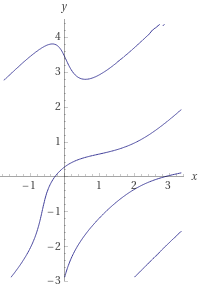

In [ ]:
# формат [[x1, x2, y1, y2], ...]
# на счет последнего отрезка неуверенна, посмотрим
dummy_loc = [[-0.9, 0, -1.2, 0], [0, 1.5, 0, 1.5], [0.8, 1.5, -0.8, -1.5]]
eps = 10**-6

In [ ]:
func1 = lambda x, y : np.tan(y - x) + x * y - 0.3
func2 = lambda x, y : x**2 + y**2 - 1.5
func = lambda x: [func1(x[0], x[1]), func2(x[0], x[1])]

# Проходим по всем областям локализации
for i in range(0, len(dummy_loc)):
  lx = [ dummy_loc[i][0], dummy_loc[i][1] ]
  ly = [ dummy_loc[i][2], dummy_loc[i][3] ]

  iter_counter = 0
  # в качестве начального решения беру точку в центре области локализации
  # (можно и другую)
  x0 = [(lx[0] + lx[1]) / 2.0, (ly[0] + ly[1]) / 2.0 ]
  sol = x0
  # якобиан
  J = np.matrix([
                 [ -1 / (np.cos(sol[1] - sol[0]))**2 + sol[1], 1 / (np.cos(sol[1] - sol[0]))**2 + sol[0] ],
                 [ 2 * sol[0], 2 * sol[1] ]
  ])
  # матрица обратная к якобиану
  J_inverse = np.linalg.inv(J)
  # критерий конца цикла: корень из суммы квадратов значений функций (нормаль) меньше  заданной точности
  while(np.linalg.norm(np.array([ func1(sol[0], sol[1]) , func2(sol[0], sol[1]) ])) > eps):
    F = np.matrix([func1(sol[0], sol[1]), func2(sol[0], sol[1])])

    sol = np.array((np.matrix(sol).T - J_inverse * F.T).T)[0]
    iter_counter += 1
  print("solution", sol)
  print("num iterations ", iter_counter)

solution [-0.6635686  -1.02940564]
num iterations  28

2 SOLUTION  [-0.66356882 -1.02940586]
solution [1.02940631 0.66356872]
num iterations  19

2 SOLUTION  [1.02940586 0.66356882]
solution [inf inf]
num iterations  5



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


LinAlgError: ignored